# CODE APRIL
Author: Promise Ekeh

Date: April 2024

Week 4 ( Day 22- Day 27)

# Day 22 - Introduction to Data Visualization

In [1]:
import pandas as pd

In [2]:
# Load the nba dataset from day 17
url ='https://media.geeksforgeeks.org/wp-content/uploads/nba.csv'
nba_df = pd.read_csv(url).dropna(how='all')
nba_df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [3]:
nba_df[['Height_ft', 'Height_inch']]=nba_df['Height'].str.split('-', expand=True)
nba_df['height_m']= (nba_df['Height_ft'].astype(int)*0.3048) + (nba_df['Height_inch'].astype(int)*0.0254)


## 1. Why is data visualisation important in data analysis? 



Data visualization is crucial in data analysis for several reasons:

* Communication: It helps in conveying insights and findings effectively to stakeholders.
* Pattern Recognition: Visual representations make it easier to identify patterns, trends, and outliers in the data.
* Decision Making: Visualizations aid in making informed decisions based on data-driven insights.
* Exploration: It allows for the exploration of complex datasets by providing intuitive summaries.


## 2. When do you use a line graph
* Line graphs are used to show trends and changes over continuous intervals or time periods. 
* They are ideal for visualizing data that has a natural progression or sequence, such as time series data.


## 3. Explain the basic steps involved in creating a plot using Matplotlib. Provide code to illustrate each step using the dataset.


(array([  1.,  13.,  32.,  62.,  32.,  87., 102.,  87.,  34.,   7.]),
 array([1.7526 , 1.79832, 1.84404, 1.88976, 1.93548, 1.9812 , 2.02692,
        2.07264, 2.11836, 2.16408, 2.2098 ]),
 <BarContainer object of 10 artists>)

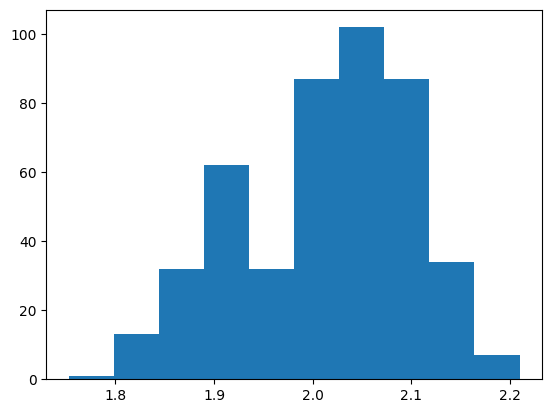

In [4]:

# Import Matplotlib:
import matplotlib.pyplot as plt

# Create Figure and Axes
fig, ax = plt.subplots()

# Plot Data
plt.hist(nba_df['height_m'])


## 4. Visualise the distribution of heights, age and weight using a histogram and what information can you deduce from the graphs


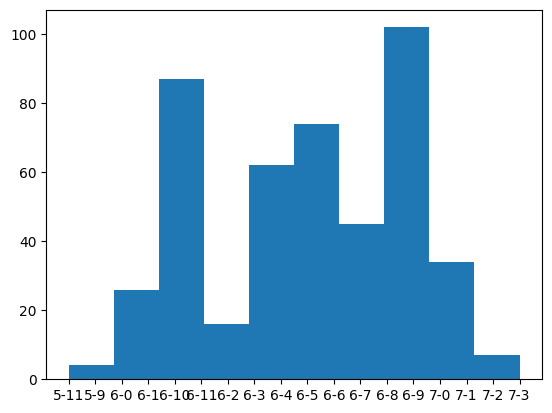

In [5]:
plt.hist(nba_df['Height'].sort_values(ascending=True));

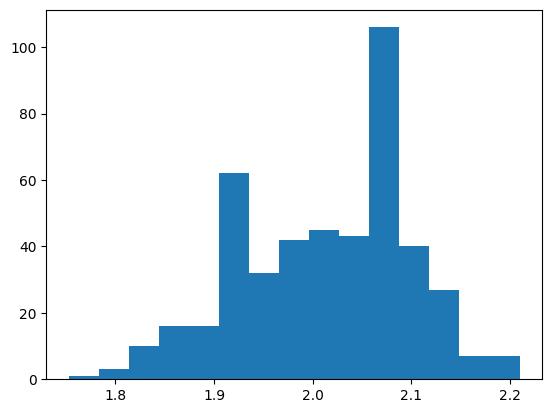

In [6]:
plt.hist(nba_df['height_m'].sort_values(ascending=True), bins=15);

In [7]:
# there are more players with heights between 2.0 and 2.1m

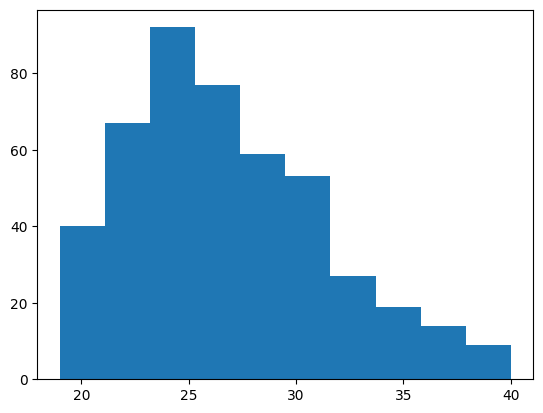

In [8]:
plt.hist(nba_df['Age'].sort_values(ascending=True));


In [9]:
# Most player are between 22-32 years

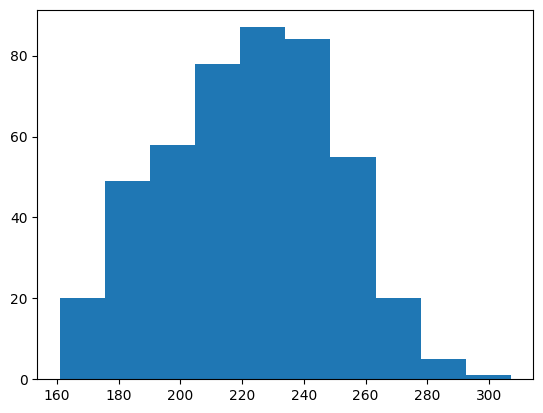

In [10]:
plt.hist(nba_df['Weight'].sort_values(ascending=True));


## 5. Using bar chart, visualise the Salary of the top 15 players with highest salary


In [11]:
nba_df[['Name', 'Salary']].sort_values(by='Salary', ascending=False).head(15)

,Name,Salary
109,Kobe Bryant,25000000.0
169,LeBron James,22970500.0
33,Carmelo Anthony,22875000.0
251,Dwight Howard,22359364.0
339,Chris Bosh,22192730.0
100,Chris Paul,21468695.0
414,Kevin Durant,20158622.0
164,Derrick Rose,20093064.0
349,Dwyane Wade,20000000.0
294,LaMarcus Aldridge,19689000.0


(<BarContainer object of 15 artists>,)

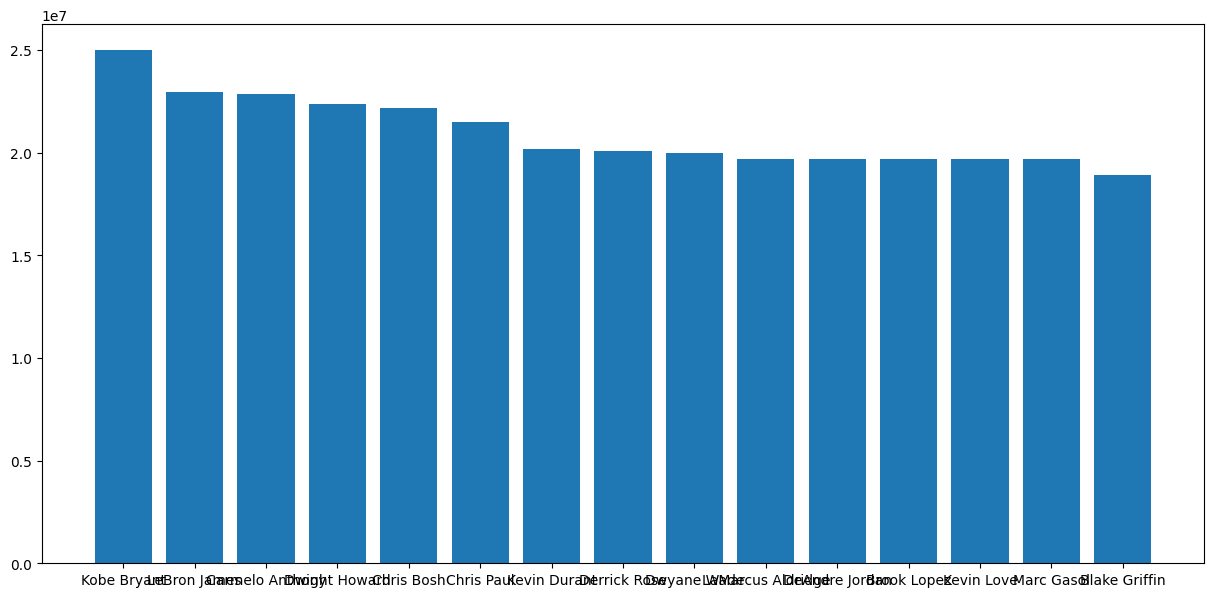

In [12]:
top_15=nba_df[['Name', 'Salary']].sort_values(by='Salary', ascending=False).head(15)
plt.figure(figsize=(15, 7))
plt.bar(top_15['Name'], top_15['Salary']),


## 6. Calculate and visualise the total salary of each team


In [13]:
nba_df.Team.unique()

array(['Boston Celtics', 'Brooklyn Nets', 'New York Knicks',
       'Philadelphia 76ers', 'Toronto Raptors', 'Golden State Warriors',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Phoenix Suns',
       'Sacramento Kings', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Detroit Pistons', 'Indiana Pacers', 'Milwaukee Bucks',
       'Dallas Mavericks', 'Houston Rockets', 'Memphis Grizzlies',
       'New Orleans Pelicans', 'San Antonio Spurs', 'Atlanta Hawks',
       'Charlotte Hornets', 'Miami Heat', 'Orlando Magic',
       'Washington Wizards', 'Denver Nuggets', 'Minnesota Timberwolves',
       'Oklahoma City Thunder', 'Portland Trail Blazers', 'Utah Jazz'],
      dtype=object)

In [14]:
nba_df.Team.nunique()


30

<Axes: xlabel='Team'>

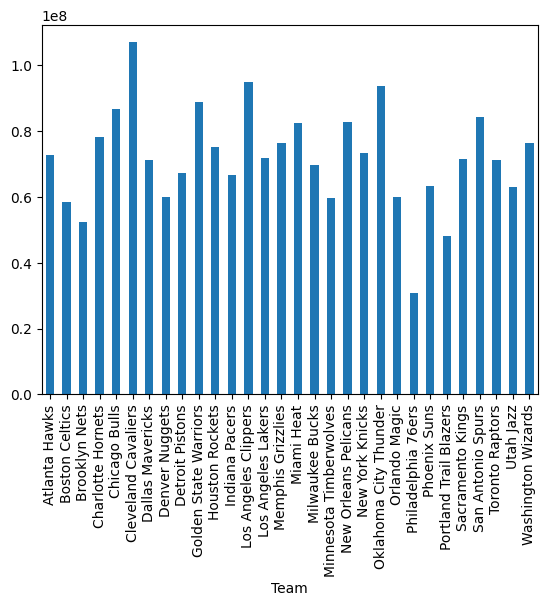

In [15]:
# nba_df.groupby('Team')['Salary'].sum().plot(kind='bar')
team_salary =nba_df.groupby('Team')['Salary'].sum()
team_salary.plot(kind='bar')

## 7. Identify the top colleges represented by players in the dataset.


In [16]:
nba_df['College'].value_counts()

College
Kentucky           22
Duke               20
Kansas             18
North Carolina     16
UCLA               15
                   ..
Utah Valley         1
Cleveland State     1
Iowa State          1
Florida State       1
Baylor              1
Name: count, Length: 118, dtype: int64

<Axes: ylabel='College'>

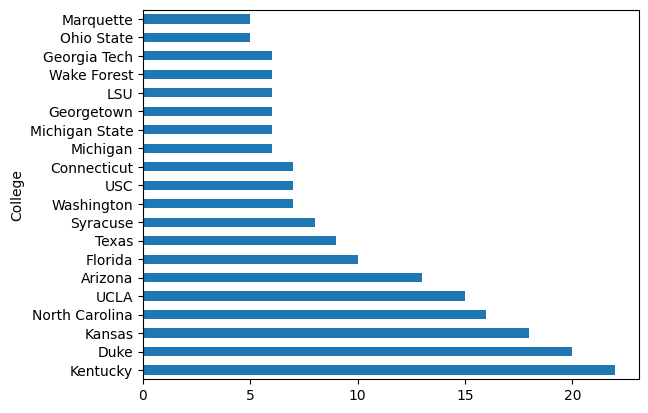

In [17]:
top_colleges= nba_df['College'].value_counts()[:20]
top_colleges.plot(kind='barh')

<Axes: xlabel='College'>

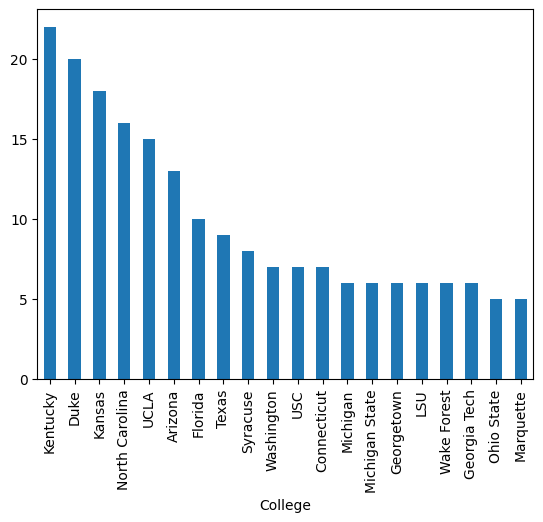

In [18]:
top_colleges.plot(kind='bar')


## others

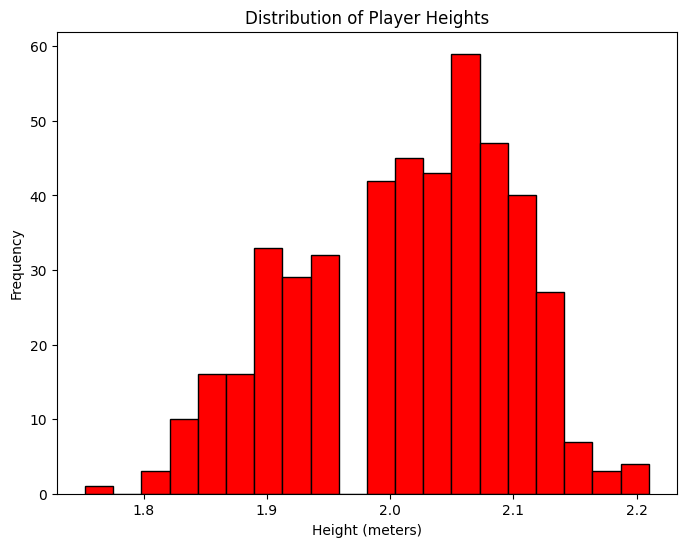

In [19]:


# Plotting player heights
plt.figure(figsize=(8, 6))
plt.hist(nba_df['height_m'], bins=20, color='red', edgecolor='black')
plt.title('Distribution of Player Heights')
plt.xlabel('Height (meters)')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x600 with 0 Axes>

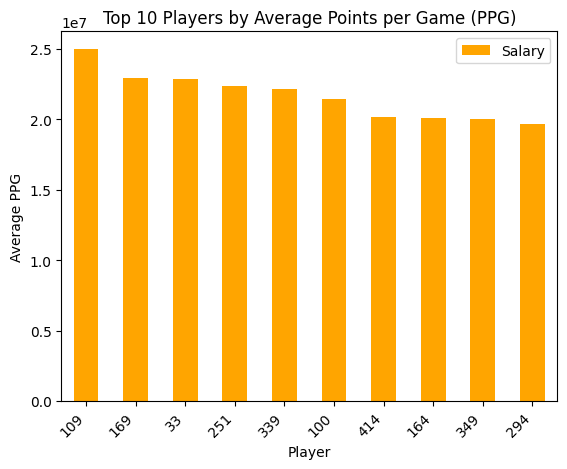

In [20]:
# Calculate average points per game (PPG) by player
# player_ppg = nba_df.groupby('Name')['Number'].mean().sort_values(ascending=False).head(10)

# Plotting top 10 players by PPG
plt.figure(figsize=(10, 6))
nba_df[['Name', 'Salary']].sort_values(by='Salary', ascending=False).head(10).plot(kind='bar', color='orange', )
plt.title('Top 10 Players by Average Points per Game (PPG)')
plt.xlabel('Player')
plt.ylabel('Average PPG')
plt.xticks(rotation=45, ha='right')
plt.show()

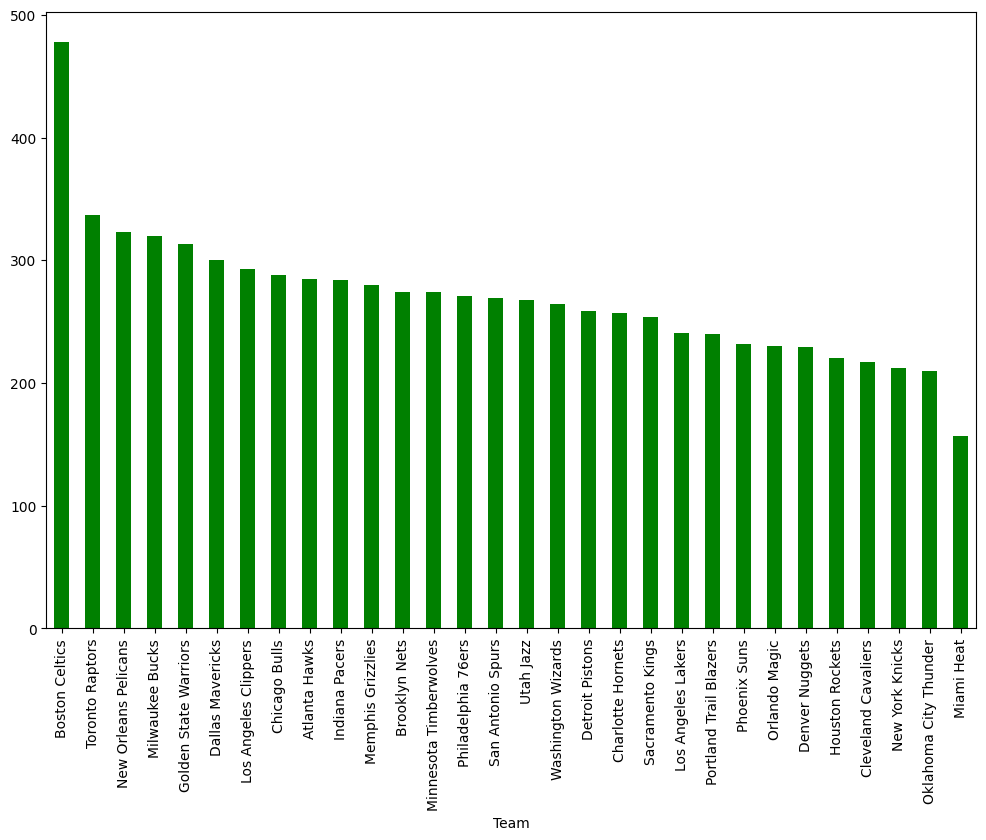

In [21]:
# Calculate and visualize the total points scored by each team.
team_points = nba_df.groupby('Team')['Number'].sum().sort_values(ascending=False)

# Plotting total points scored by each team
plt.figure(figsize=(12, 8))
team_points.plot(kind='bar', color='green')
# plt.title('Total Points Scored by NBA Teams')
# plt.xlabel('Team')
# plt.ylabel('Total Points')
# plt.xticks(rotation=45, ha='right')
plt.show()

In [22]:
nba_df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary', 'Height_ft', 'Height_inch', 'height_m'],
      dtype='object')

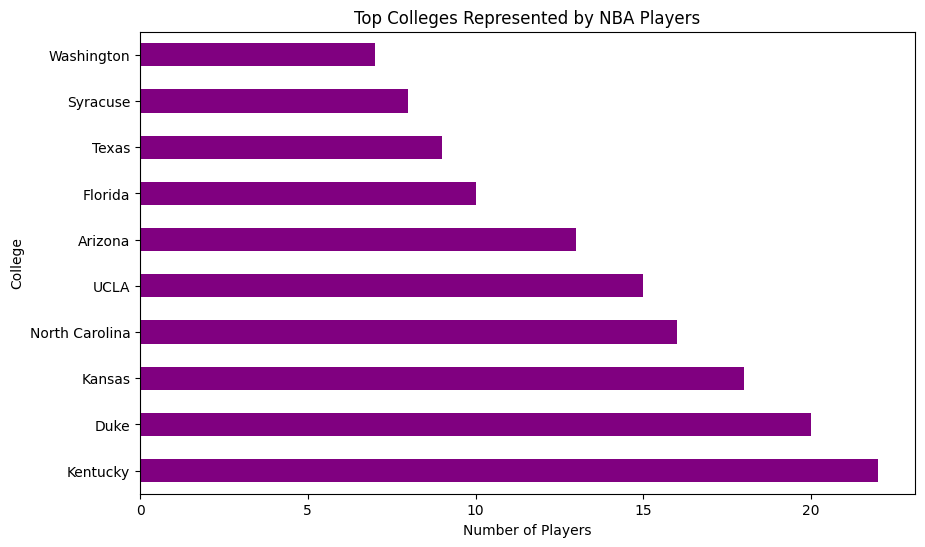

In [23]:
# Count the number of players from each college
college_counts = nba_df['College'].value_counts().head(10)

# Plotting colleges with most players
plt.figure(figsize=(10, 6))
college_counts.plot(kind='barh', color='purple')
plt.title('Top Colleges Represented by NBA Players')
plt.xlabel('Number of Players')
plt.ylabel('College')
plt.show()

# Day 23:  Advanced plotting & customization

In [24]:
# Using the nba datasets


## 1. Explain the significance of adding labels, titles, and legends to a plot.


Adding labels, titles, and legends to a plot is essential for enhancing its interpretability and communicative effectiveness. Here's why each element is significant:

*Labels (Axis Labels)*: Axis labels provide context and interpretation for the plotted data. They indicate what each axis represents, such as the measured quantity (e.g., height, weight) and its unit of measurement. Labels make it clear to the viewer what information is being presented.

*Title*: A plot title summarizes the purpose or content of the plot. It provides a concise description that helps viewers understand the overall message or focus of the visualization. A good title should be informative and relevant to the data being presented.

*Legend*: Legends are crucial for identifying different elements within a plot, especially when multiple datasets or categories are involved. They explain the meaning of colors, markers, or line styles used in the plot. Legends help viewers associate specific elements with corresponding data categories.

In [25]:
## 2. Demonstrate how adding appropriate labels enhances the interpretability of the plots from day 22


## 3. Create a pie chart to show proportions of the different positions in the dataset


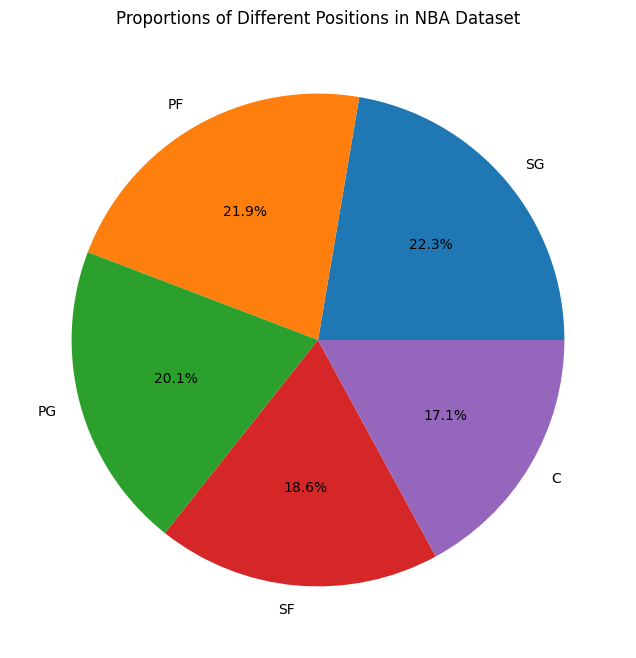

In [26]:
# Create pie chart to show proportions of different positions in the dataset
position_counts = nba_df['Position'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%')
plt.title('Proportions of Different Positions in NBA Dataset')
plt.show()



## 4. Create scatter plot to visualize relationship between player heights and weights


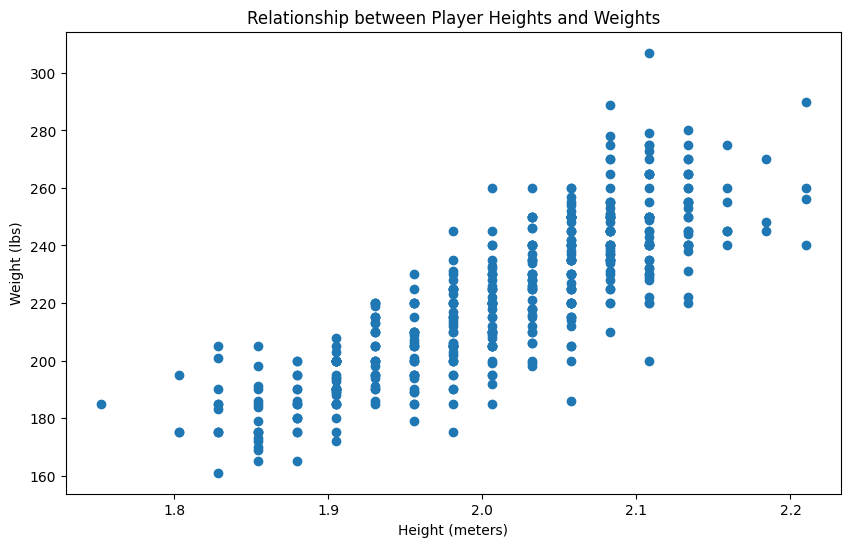

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(x='height_m', y='Weight', data=nba_df)
plt.title('Relationship between Player Heights and Weights')
plt.xlabel('Height (meters)')
plt.ylabel('Weight (lbs)')
plt.show()


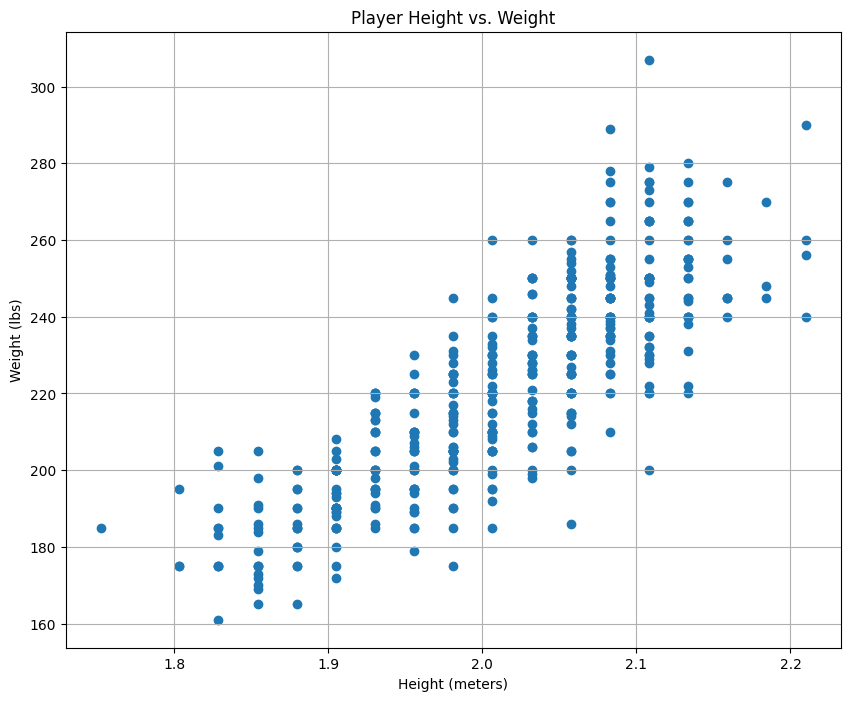

In [28]:
# Scatter plot of player height vs. weight
plt.figure(figsize=(10, 8))
plt.scatter(nba_df['height_m'], nba_df['Weight'],)
plt.title('Player Height vs. Weight')
plt.xlabel('Height (meters)')
plt.ylabel('Weight (lbs)')
plt.grid(True)
plt.show()

## 5. Create scatter plots to  Number and salary

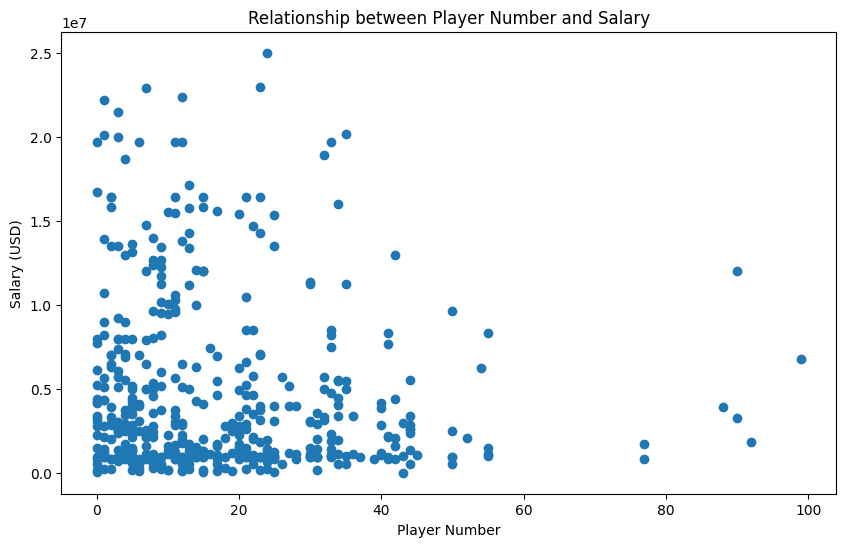

In [29]:
	
# Create scatter plots to  Number and salary
plt.figure(figsize=(10, 6))
plt.scatter(x='Number', y='Salary', data=nba_df)
plt.title('Relationship between Player Number and Salary')
plt.xlabel('Player Number')
plt.ylabel('Salary (USD)')
plt.show()


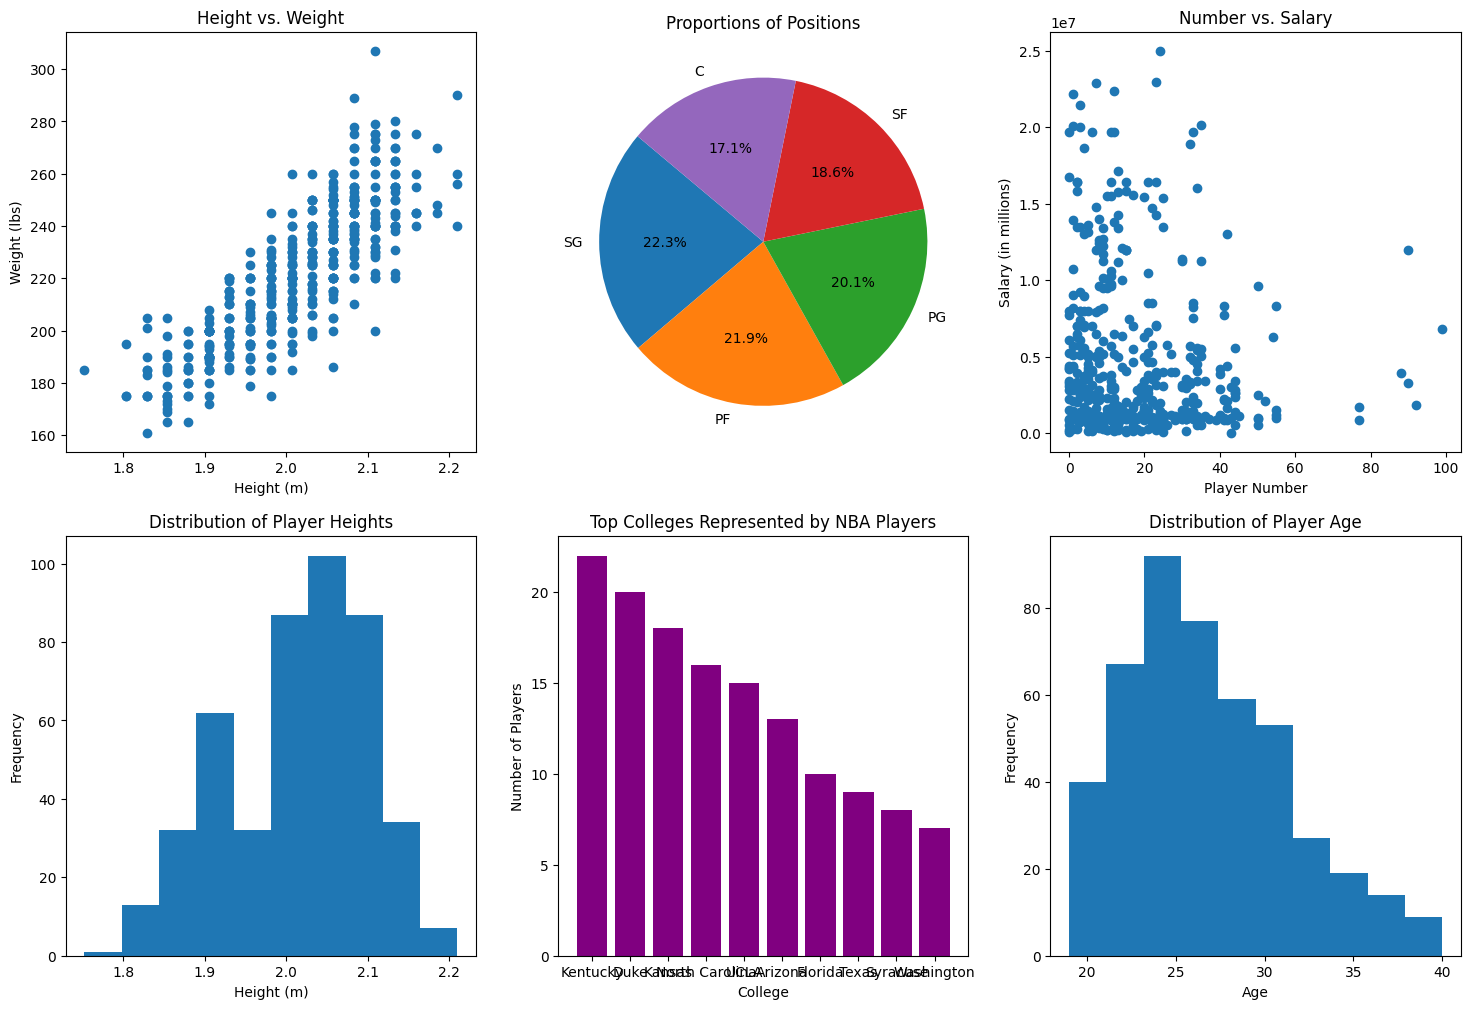

In [30]:
# Create a subplot of 2 rows and 3 cols, add different plots to the axes and label accordingly
# Create subplot of 2 rows and 3 columns with different plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Scatter plot 1: Height vs. Weight
axes[0, 0].scatter(x='height_m', y='Weight', data=nba_df)
axes[0, 0].set_title('Height vs. Weight')
axes[0, 0].set_xlabel('Height (m)')
axes[0, 0].set_ylabel('Weight (lbs)')

# Pie chart Plot2: Proportions of Positions
axes[0, 1].pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title('Proportions of Positions')

# Scatter plot 3: Number vs. Salary
axes[0, 2].scatter(x='Number', y='Salary', data=nba_df)
axes[0, 2].set_title('Number vs. Salary')
axes[0, 2].set_xlabel('Player Number')
axes[0, 2].set_ylabel('Salary (in millions)')

# Plot 4: Histogram of player heights
axes[1, 0].hist(nba_df['height_m'], bins=10)
axes[1, 0].set_title('Distribution of Player Heights')
axes[1, 0].set_xlabel('Height (m)')
axes[1, 0].set_ylabel('Frequency')



# Plot 5: Bar chart the number of players from each college
college_counts = nba_df['College'].value_counts().head(10)

axes[1, 1].bar(college_counts.index, college_counts,  color='purple')
axes[1, 1].set_title('Top Colleges Represented by NBA Players')
axes[1, 1].set_ylabel('Number of Players')
axes[1, 1].set_xlabel('College')


# Plot 6: Histogram of player age
axes[1, 2].hist(nba_df['Age'], bins=10)
axes[1, 2].set_title('Distribution of Player Age')
axes[1, 2].set_xlabel('Age')
axes[1, 2].set_ylabel('Frequency')
# plt.tight_layout()
plt.show()

# day 24

In [31]:
import seaborn as sns

## 1. Create a scatter plot using Seaborn to visualise the relationship between player age  and salary.

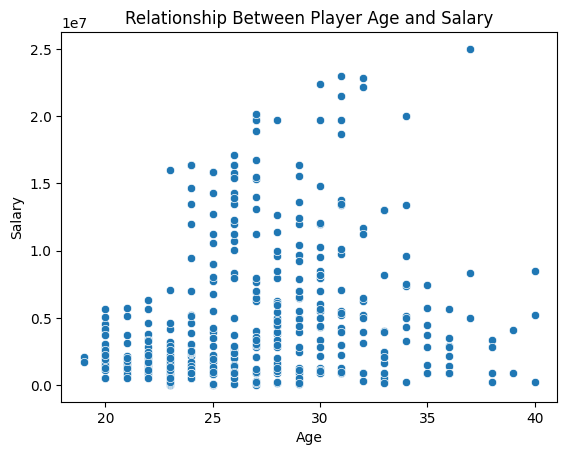

In [32]:
sns.scatterplot(data=nba_df, x='Age', y='Salary')
plt.title('Relationship Between Player Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

## 2. Use Seaborn to create a bar plot showing the average salary  for each player position.

In [33]:
import numpy as np

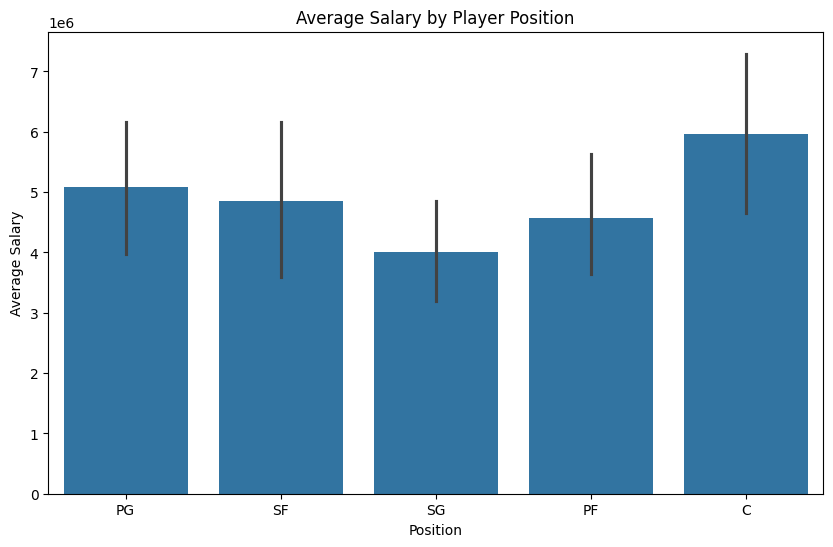

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(data=nba_df, x='Position', y='Salary', estimator=np.mean)
plt.title('Average Salary by Player Position')
plt.xlabel('Position')
plt.ylabel('Average Salary')
plt.show()


## 3. Plot a histogram using Seaborn to visualise the distribution of player heights (in meters), age and weight.

Text(0, 0.5, 'Frequency')

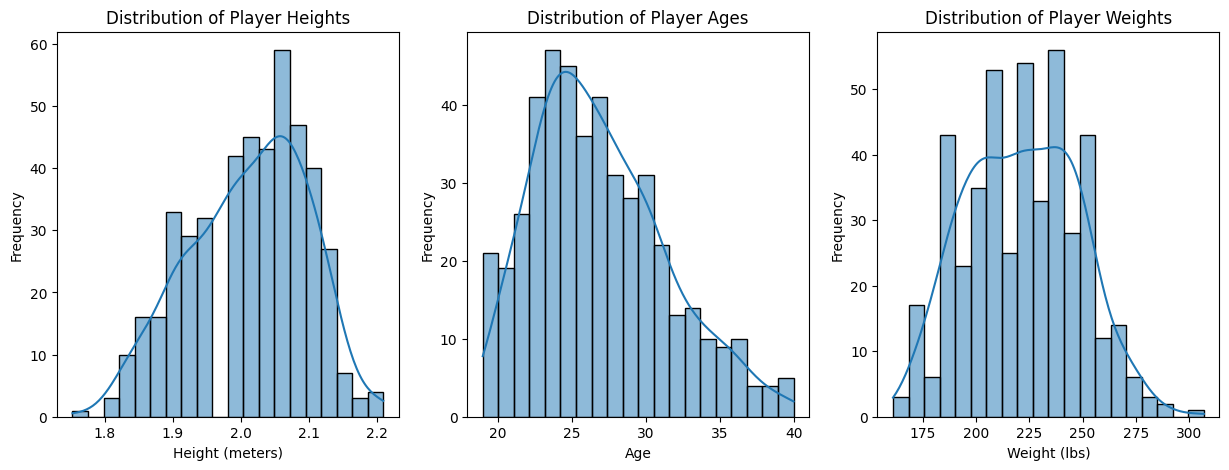

In [35]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(nba_df['height_m'], bins=20, kde=True)
plt.title('Distribution of Player Heights')
plt.xlabel('Height (meters)')
plt.ylabel('Frequency')


plt.subplot(1, 3, 2)
sns.histplot(nba_df['Age'], bins=20, kde=True)
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(nba_df['Weight'], bins=20, kde=True)
plt.title('Distribution of Player Weights')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')

## 4. Generate a box plot with Seaborn to compare the salary distribution across different player positions.


C:\Users\promi\AppData\Local\Temp\ipykernel_2432\1845691513.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Position', y='Salary', data=nba_df, palette='coolwarm')


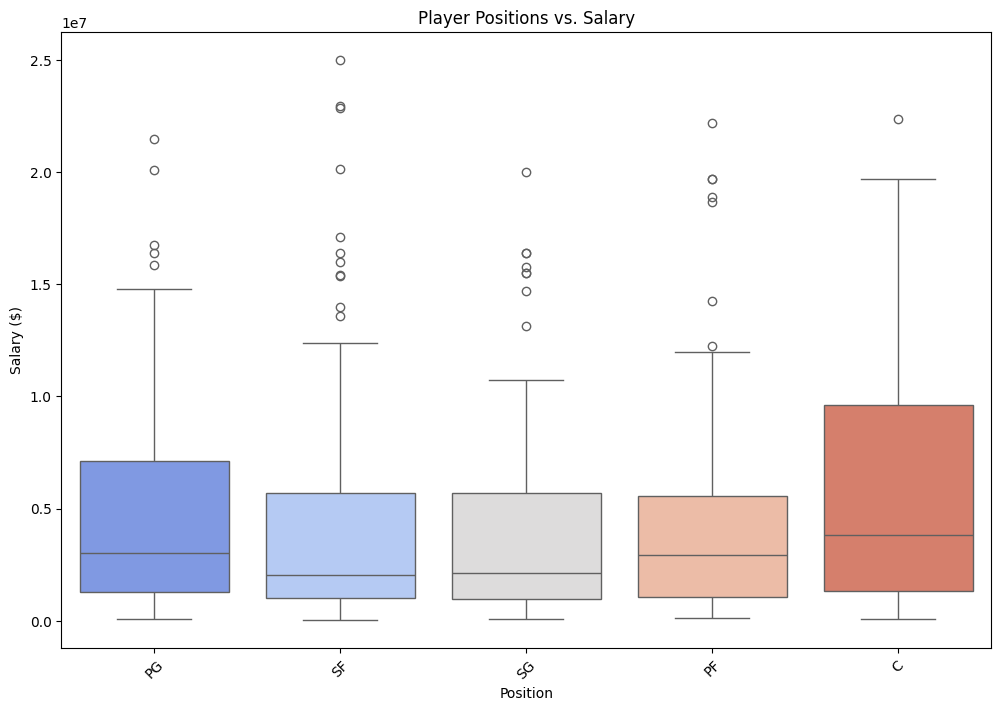

In [36]:
# Box plot of salaries by player positions
plt.figure(figsize=(12, 8))
sns.boxplot(x='Position', y='Salary', data=nba_df, palette='coolwarm')
plt.title('Player Positions vs. Salary')
plt.xlabel('Position')
plt.ylabel('Salary ($)')
plt.xticks(rotation=45)
plt.show()

## 5. Create a categorical plot (e.g., violin plot or swarm plot) using Seaborn to show the distribution of player ages by position.


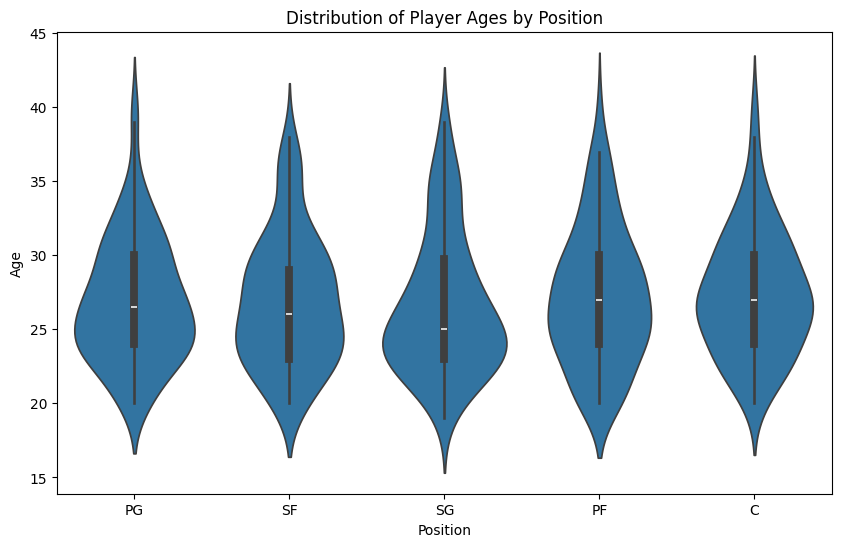

In [37]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=nba_df, x='Position', y='Age')
plt.title('Distribution of Player Ages by Position')
plt.xlabel('Position')
plt.ylabel('Age')
plt.show()

## 6. Use Seaborn to plot a kernel density estimate (KDE) of player weights across different position.


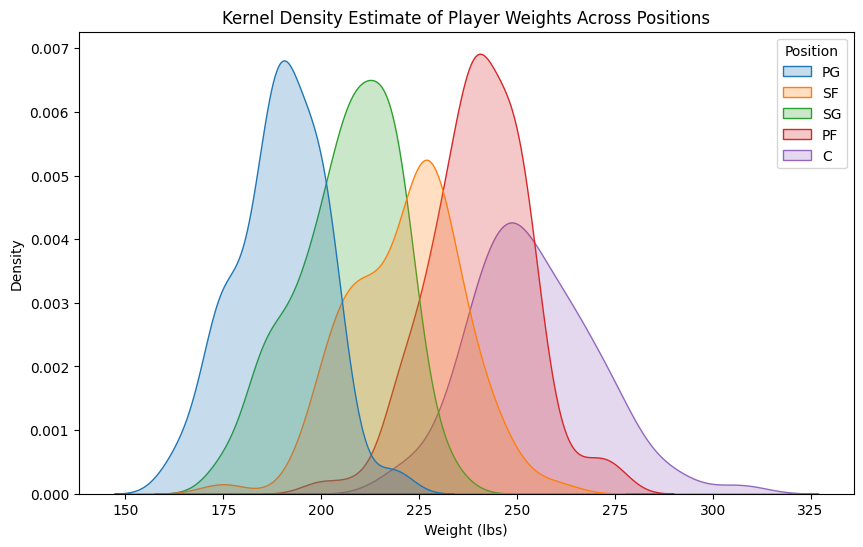

In [38]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=nba_df, x='Weight', hue='Position', fill=True)
plt.title('Kernel Density Estimate of Player Weights Across Positions')
plt.xlabel('Weight (lbs)')
plt.ylabel('Density')
plt.show()

## 7. Use Seaborn's pairplot function to visualise pairwise relationships 

between numeric columns ('Age', 'Height', 'Weight', 'Salary') in the dataset with position as ‘Hue’. Attempt to explain the pairplot.


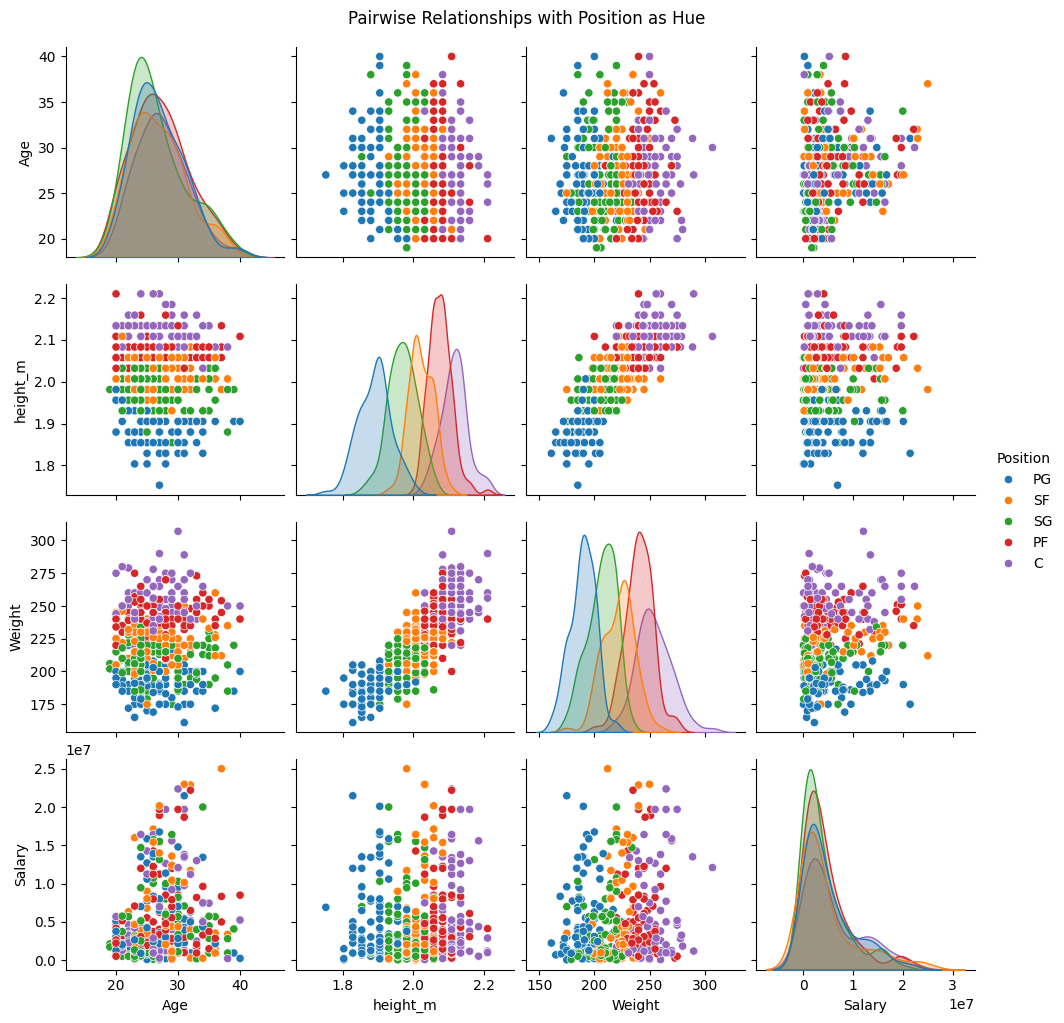

In [39]:
sns.pairplot(data=nba_df, vars=['Age', 'height_m', 'Weight', 'Salary'], hue='Position')
plt.suptitle('Pairwise Relationships with Position as Hue', y=1.02)
plt.show()

## 8. Create a heatmap using Seaborn to visualise the correlation matrix between numeric columns in the dataset ('Age', 'Height_m', 'Weight', 'Salary'). Explain the heatmap


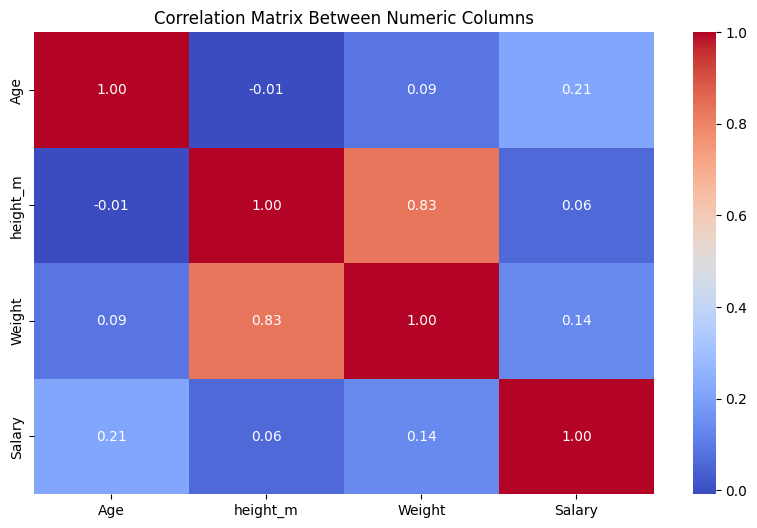

In [40]:
plt.figure(figsize=(10, 6))
corr_matrix = nba_df[['Age', 'height_m', 'Weight', 'Salary']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Between Numeric Columns')
plt.show()

## 9. Experiment with customising Seaborn plots by changing plot styles, colour palettes, labels, titles, and other plot parameters.


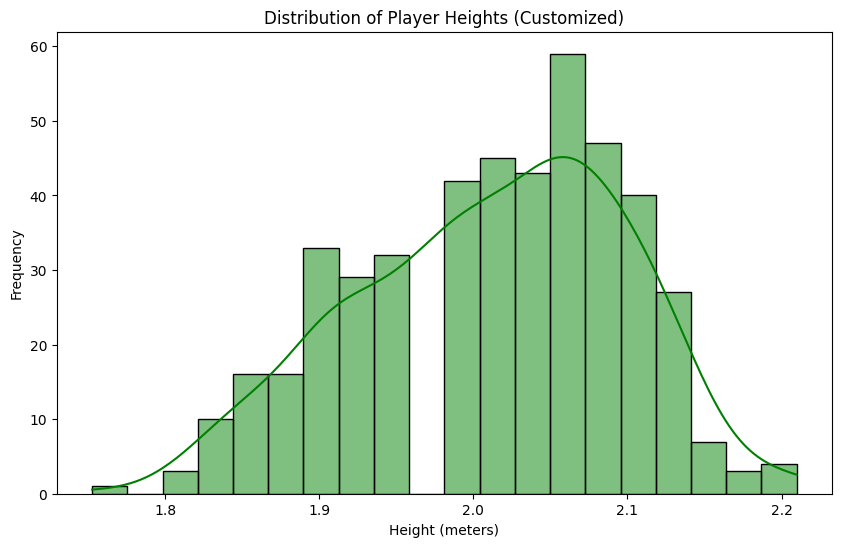

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(nba_df['height_m'], bins=20, kde=True, color='green')
plt.title('Distribution of Player Heights (Customized)')
plt.xlabel('Height (meters)')
plt.ylabel('Frequency')
plt.show()

## Other Plots

C:\Users\promi\AppData\Local\Temp\ipykernel_2432\3447609613.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Position', y='Age', data=nba_df, palette='Set3')


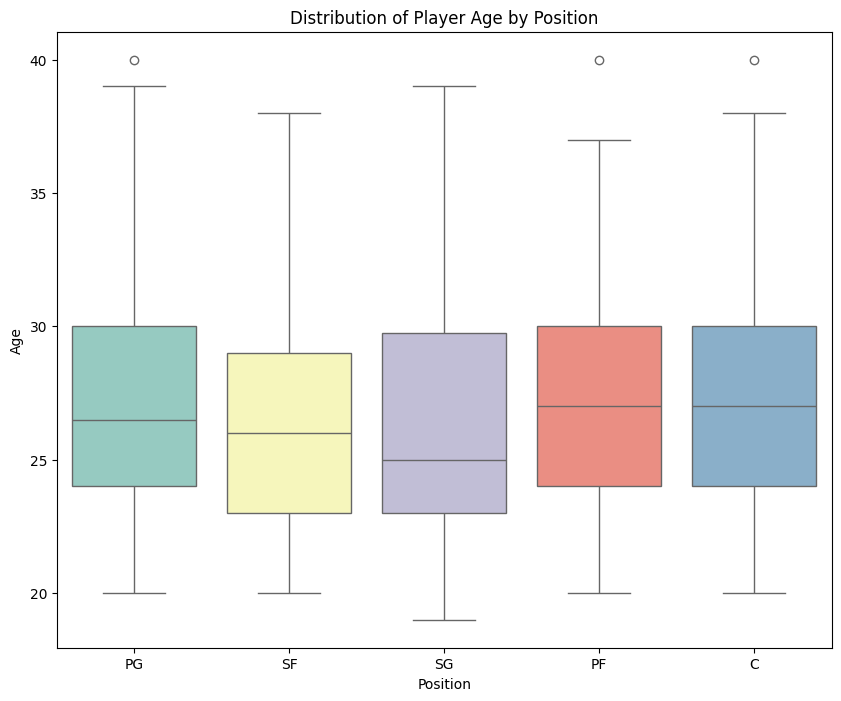

In [42]:
# Create a box plot of player age by position
plt.figure(figsize=(10, 8))
sns.boxplot(x='Position', y='Age', data=nba_df, palette='Set3')
plt.title('Distribution of Player Age by Position')
plt.xlabel('Position')
plt.ylabel('Age')
plt.show()

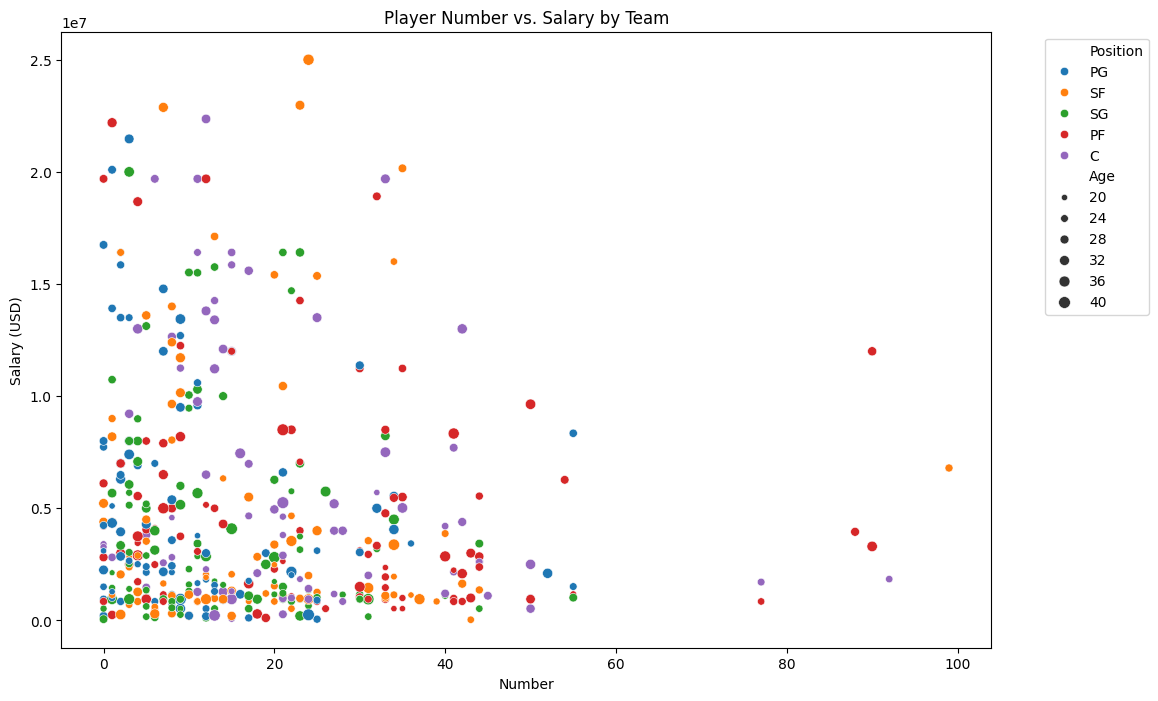

In [43]:
# Create a scatter plot of player weight vs. salary colored by team
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Number', y='Salary', hue='Position',  size='Age', data=nba_df)
plt.title('Player Number vs. Salary by Team')
plt.xlabel('Number')
plt.ylabel('Salary (USD)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

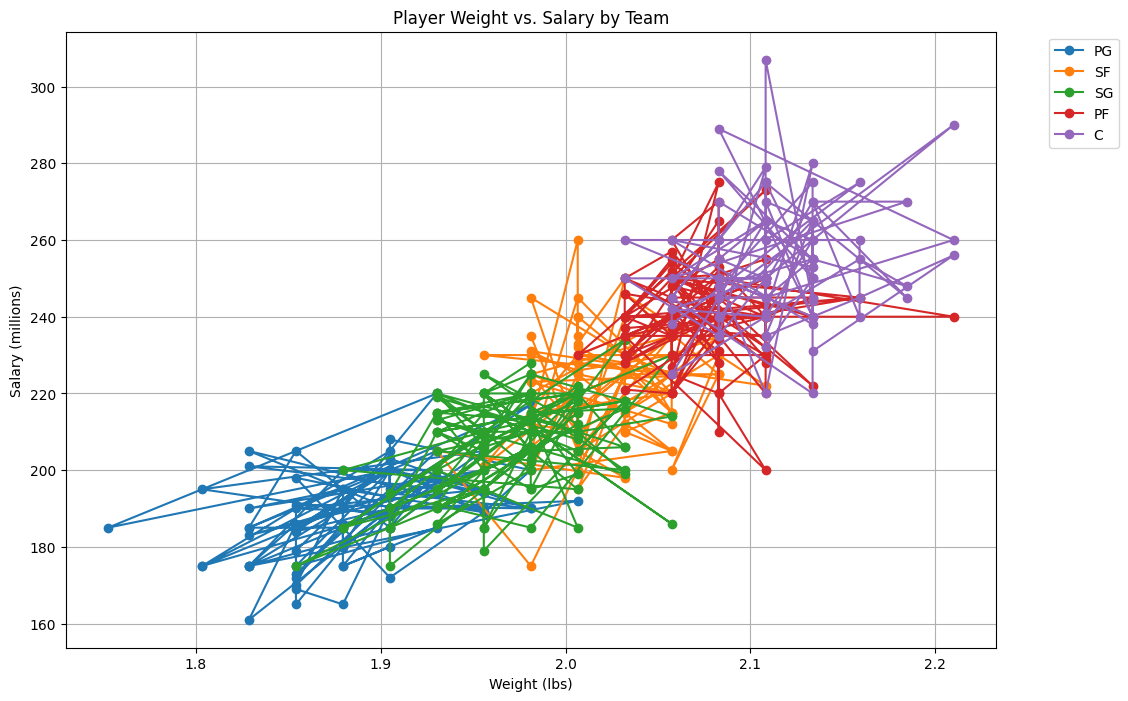

In [44]:
# Define a list of unique team names
teams = nba_df['Position'].unique()

# Create a line plot of player weight vs. salary colored by team
plt.figure(figsize=(12, 8))

# Iterate over each team and plot their data points
for team in teams:
    team_data = nba_df[nba_df['Position'] == team]
    plt.plot(team_data['height_m'], team_data['Weight'], marker='o', linestyle='-', label=team)

# Add labels and title
plt.title('Player Weight vs. Salary by Team')
plt.xlabel('Weight (lbs)')
plt.ylabel('Salary (millions)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside the plot
plt.grid(True)  # Add grid lines for better readability

plt.show()